In [174]:
import pandas as pd
pd.set_option('display.max_row', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import json

import seaborn as sns
sns.set_style('darkgrid')

In [175]:
with open('test3.txt') as f:
    mylist =f.readlines() 

In [176]:
data = mylist[-1]

In [177]:
data1 = data.replace("'[",'')
data1 = data1.replace("]'",'')

In [178]:
df = pd.read_json(data1)

In [179]:
df.head()

,preds,time
0,[],16:39
1,"[{'neutral': 0.9942440390586851, 'happy': 0.00...",16:41
2,"[{'neutral': 0.072685904800891, 'happy': 3.178...",16:43
3,"[{'neutral': 0.6764919161796571, 'happy': 1.91...",16:45
4,"[{'neutral': 0.8284432888031, 'happy': 3.09826...",16:47


In [180]:
list_of_dict = []
for j in range(len(df)):
    for i in range(len(df.loc[j].preds)):
        item = {}
        time = df.iloc[j].time
        item['time'] = time
        for key, value in df.loc[j].preds[i].items():
            item[key] = value
        list_of_dict.append(item)

wrangled_df = pd.DataFrame(list_of_dict)


In [181]:
for elem in range(len(wrangled_df.time)):
    wrangled_df.time[elem] = wrangled_df.time[elem].replace(':','.')
    

/home/stanislas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [182]:
wrangled_df['time'] = pd.to_numeric(wrangled_df.time)

In [208]:
mean_df = wrangled_df.groupby('time').mean().head()

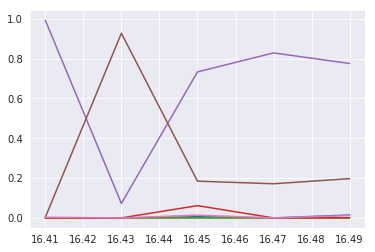

In [209]:
plt.plot(mean_df)
plt.show()